In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('FuelConsumptionCo2.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   Brands                    1067 non-null   object 
 2   VEHICLECLASS              1067 non-null   object 
 3   ENGINESIZE                1067 non-null   float64
 4   CYLINDERS                 1067 non-null   int64  
 5   TRANSMISSION              1067 non-null   object 
 6   FUELTYPE                  1067 non-null   object 
 7   FUELCONSUMPTION_CITY      1067 non-null   float64
 8   FUELCONSUMPTION_HWY       1067 non-null   float64
 9   FUELCONSUMPTION_COMB      1067 non-null   float64
 10  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 11  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 100.2+ KB


In [3]:
data.head()

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# هنعمل تحويل للداتا غير الرقمية إلى رقمية 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)


In [5]:
data.head()

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,0,0,7,1,10,3,38,16,30,22,36
1,0,0,0,9,1,20,3,51,26,41,18,49
2,0,0,0,4,1,17,3,6,7,6,37,6
3,0,0,11,16,3,11,3,66,40,56,14,70
4,0,0,11,16,3,11,3,60,36,51,16,63


In [6]:
x = data.drop(['CO2EMISSIONS'],axis=1)
y = data['CO2EMISSIONS']
xx = np.array(x)
yy= np.array(y)


split data

In [7]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train,y_test =train_test_split(xx,yy,test_size=33,random_state=100)

train randomforest

In [8]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

Evalute model 

هنقيس الايرور بتاعنا بكذا طريقة اللي اتشرحت

In [20]:
from sklearn import metrics
y_pred = regressor.predict(x_test)
y_test 
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R² Score: ',metrics.r2_score(y_test,y_pred))
print('MAPE: ',metrics.mean_absolute_percentage_error(y_test,y_pred))
mape = metrics.mean_absolute_percentage_error(y_test,y_pred)
print('MAPE: ',round(mape*100,2),'%')


MAE:  0.2506060606060606
MSE:  0.7458818181818184
RMSE:  0.863644497569352
R² Score:  0.9993472425182424
MAPE:  0.009449251871986133
MAPE:  0.94 %


visualize random forest

In [10]:
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz
#Dot data
i_tree = 0
for tree_in_forest in regressor.estimators_:

    dot_data = tree.export_graphviz(tree_in_forest, out_file = None,
                                  feature_names=x.columns,
                                  filled=True,rounded=True)
  
#Draw graph
    graph = graphviz.Source(dot_data,format='png')
    graph

graph.render('tree',format='png',view=True)

'tree.png'

extract important features

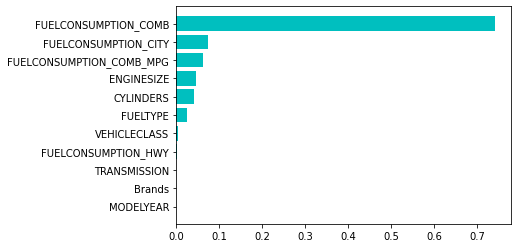

In [14]:
columns_name= ['MODELYEAR', 'Brands', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
        'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
        'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
        'FUELCONSUMPTION_COMB_MPG']
features = columns_name
importance = regressor.feature_importances_
indices = np.argsort(importance)
plt.barh(range(len(indices)),importance[indices],color='c',align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.show()

cross validation

In [24]:
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(n_splits=25,random_state=1,shuffle=True)
scores = cross_val_score(regressor,x,y,scoring = "neg_mean_squared_error",cv=cv,n_jobs=-1)
avg = np.mean(np.absolute(scores))
print("neg_mean_squared_error",avg)

neg_mean_squared_error 11.6748450055371
